# Chapter 8 Exercises

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    path = os.path.join("images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [33]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [45]:
X, y = mnist["data"], mnist["target"]

In [47]:
import numpy as np

shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]

In [36]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
%time forest_clf.fit(X_train, y_train)

CPU times: user 2.99 s, sys: 32 ms, total: 3.02 s
Wall time: 3.02 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import accuracy_score

y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.94779999999999998

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pcaT = PCA(n_components = 154)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pcaT.fit_transform(X_test)

In [40]:
X_train_2D.shape

(60000, 154)

In [41]:
forest_clf_2D = RandomForestClassifier(random_state=42)
%time forest_clf_2D.fit(X_train_2D, y_train)

CPU times: user 8.47 s, sys: 8 ms, total: 8.48 s
Wall time: 8.48 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [42]:
y_pred_2D = forest_clf_2D.predict(X_test_2D)
accuracy_score(y_test, y_pred_2D)

0.29759999999999998

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [14]:
from sklearn.manifold import TSNE

subset = X[:1000]

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(subset)

In [15]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(subset)

In [16]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(subset)

In [19]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)

X_reduced = rbf_pca.fit_transform(X[:1000])

Saving figure MNIST_dim_reduction_plot


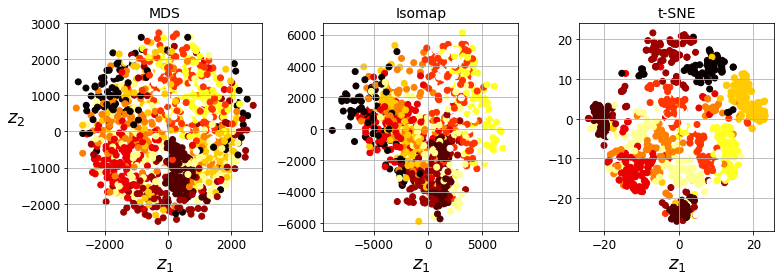

In [23]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y[:1000], cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("MNIST_dim_reduction_plot")
plt.show()